In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [ ]:
df = pd.read_csv('C:\\Users\\M\\sql-work\\project\\ratio.csv')
df.head()

,시군구,수급권자수,구별인구수,고령자수,온열질환자수,수용인원,고령자비율,수급자비율,수용률,온열환자비율,최고온도
0,강남구,5249,607337,95937,137,1747,0.157963,0.008643,0.002876,0.000226,34.0
1,강북구,8112,291372,69366,26,2216,0.238067,0.027841,0.007605,0.000089,33.0
2,강서구,12198,567159,103825,101,7109,0.183062,0.021507,0.012534,0.000178,32.0
3,관악구,9502,553533,96722,84,2304,0.174736,0.017166,0.004162,0.000152,32.0
4,광진구,3568,327550,53447,43,3333,0.163172,0.010893,0.010176,0.000131,32.0


In [ ]:
mf = pd.read_csv('C:\\Users\\M\\sql-work\\project\\평균기온.csv')
mf.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df = pd.merge(df, mf, on = '시군구', how = 'inner')

In [ ]:
df.rename(columns = {'기온':'평균기온'}, inplace = True)

In [ ]:
df.head()

,시군구,수급권자수,구별인구수,고령자수,온열질환자수,수용인원,고령자비율,수급자비율,수용률,온열환자비율,최고온도,평균기온
0,강남구,5249,607337,95937,137,1747,0.157963,0.008643,0.002876,0.000226,34.0,13.8889
1,강북구,8112,291372,69366,26,2216,0.238067,0.027841,0.007605,0.000089,33.0,13.6300
2,강서구,12198,567159,103825,101,7109,0.183062,0.021507,0.012534,0.000178,32.0,13.3556
3,관악구,9502,553533,96722,84,2304,0.174736,0.017166,0.004162,0.000152,32.0,11.9500
4,광진구,3568,327550,53447,43,3333,0.163172,0.010893,0.010176,0.000131,32.0,13.7000


### 상관관계 분석

In [ ]:

df[['수용률', '온열환자비율']].corr()

,수용률,온열환자비율
수용률,1.000000,-0.366529
온열환자비율,-0.366529,1.000000


In [ ]:
df[['고령자수', '온열질환자수']].corr()

,고령자수,온열질환자수
고령자수,1.000000,0.192127
온열질환자수,0.192127,1.000000


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

result = ols('온열환자비율 ~ 고령자비율 + 수급자비율 + 수용률 + 평균기온 + 최고온도', data = df).fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 온열환자비율   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     1.745
Date:                Fri, 21 Jun 2024   Prob (F-statistic):              0.178
Time:                        18:39:42   Log-Likelihood:                 164.29
No. Observations:                  23   AIC:                            -316.6
Df Residuals:                      17   BIC:                            -309.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0003      0.002     -0.111      0.913      -0.005       0.005
고령자비율          0.0023      0.004      0.580      0.569      -0.006       0.011
수급자비율         -0.0240      0.016     -1.462      0.162      -0.059       0.011
수용률           -0.0123      0.008     -1.506      0.150      -0.029       0.005
평균기온       -6.491e-05   8.39e-05     -0.773      0.450      -0.000       0.000
최고온도        4.392e-05   8.87e-05      0.495      0.627      -0.000       0.000
==============================================================================
Omnibus:                       14.485   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.769
Skew:                           1.404   Prob(JB):                     0.000621
Kurtosis:                       5.744   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

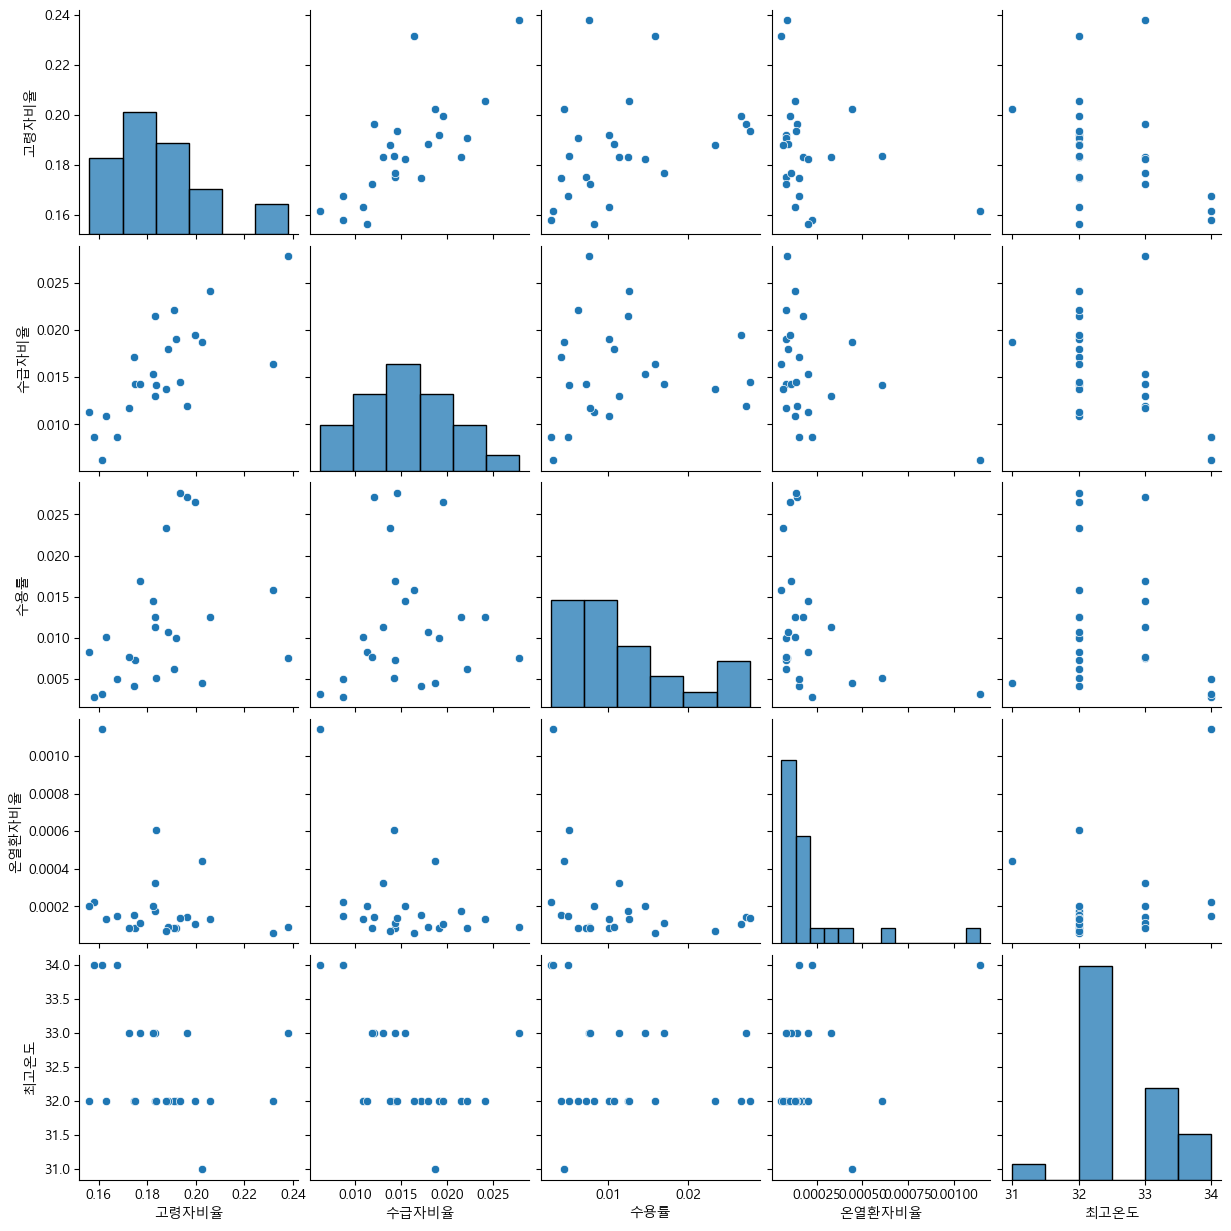

In [ ]:
sns.pairplot(df.iloc[:, 6:])